In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from pydataset import data

In [2]:
url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

df = pd.read_csv(url)

In [3]:
# peek at the head, what this data set looks like
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


In [6]:
# determine size of data
df.shape

(365, 7)

In [7]:
# Date to index
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')

# feature engineer Month
df['Month'] = df.index.month_name()

df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-01-02,Monday,28.9,1.33,15,0.5,13,January
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January


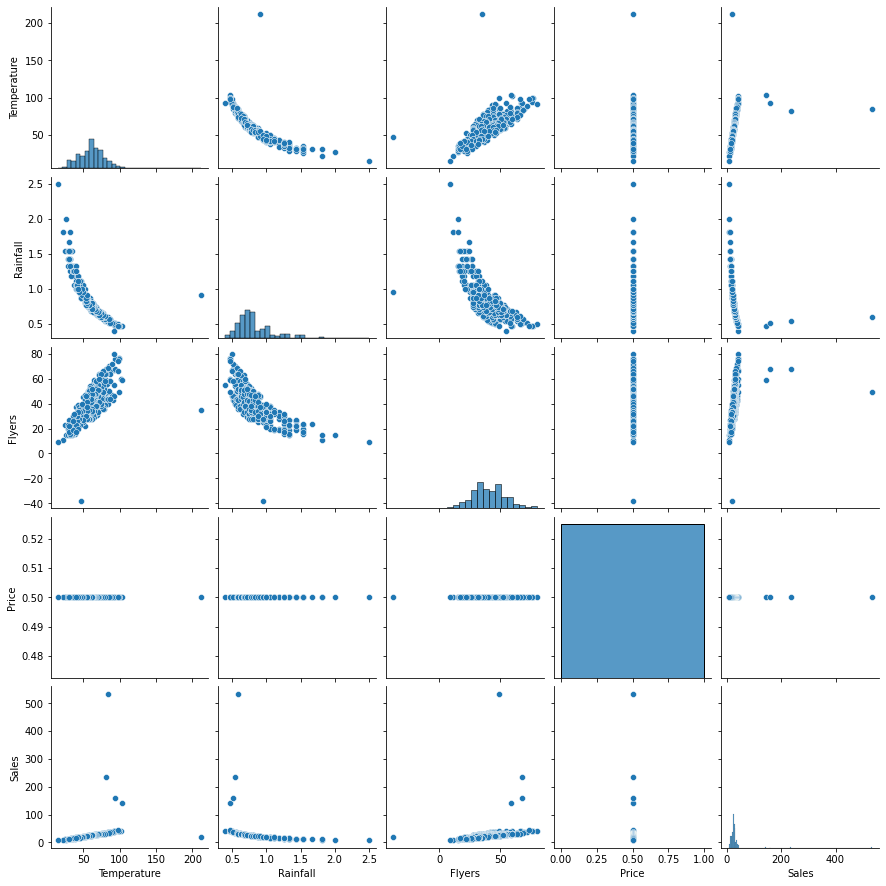

In [8]:
sns.pairplot(df)
plt.show()

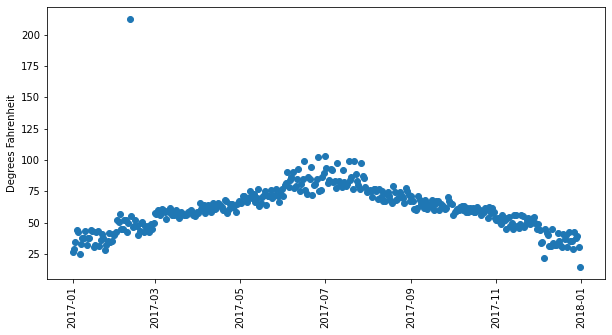

In [9]:
# Temp over time
plt.figure(figsize=(10,5))
plt.scatter(df.index, df.Temperature)
plt.xticks(rotation=90)
plt.ylabel("Degrees Fahrenheit")
plt.show()

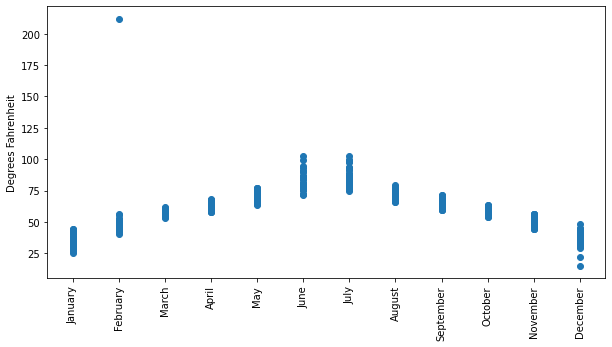

In [10]:
# Temp over time simplified
plt.figure(figsize=(10,5))
plt.scatter(df.Month, df.Temperature)
plt.xticks(rotation=90)
plt.ylabel("Degrees Fahrenheit")
plt.show()

In [11]:
df[df.Temperature > 120]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February


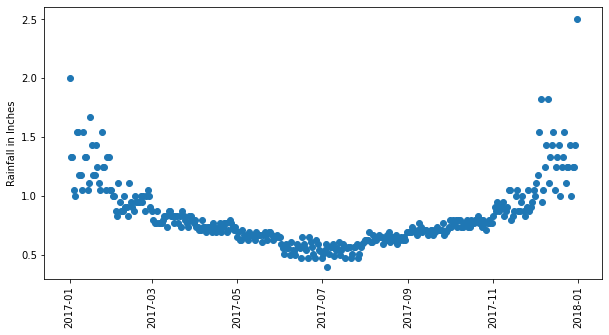

In [12]:
plt.figure(figsize=(10,5))
plt.scatter(df.index, df.Rainfall)
plt.xticks(rotation=90)
plt.ylabel("Rainfall in Inches")
plt.show()

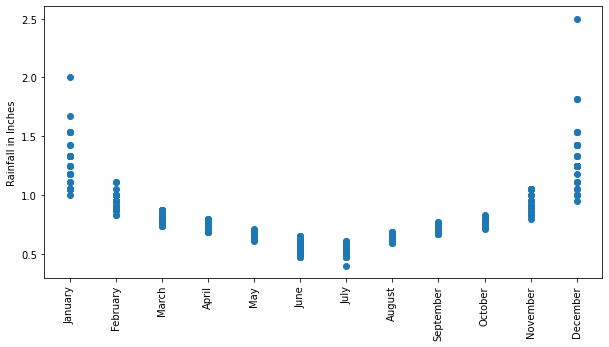

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(df.Month, df.Rainfall)
plt.xticks(rotation=90)
plt.ylabel("Rainfall in Inches")
plt.show()

In [14]:
df[df.Rainfall > 1.8]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January
2017-12-05,Tuesday,22.0,1.82,11,0.5,10,December
2017-12-10,Sunday,31.3,1.82,15,0.5,11,December
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December


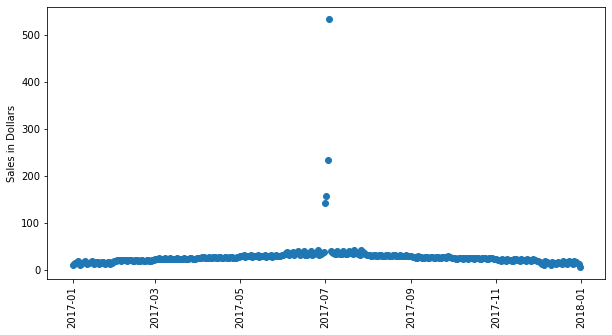

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(df.index, df.Sales)
plt.xticks(rotation=90)
plt.ylabel("Sales in Dollars")
plt.show()

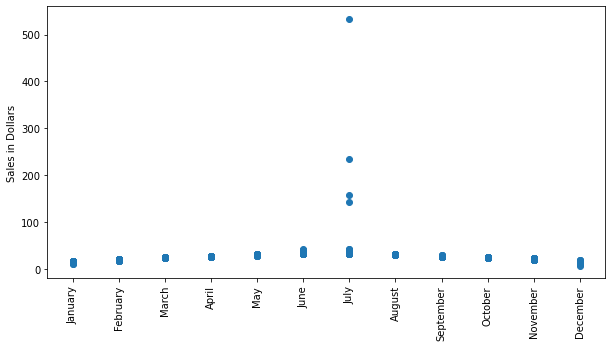

In [16]:
plt.figure(figsize=(10,5))
plt.scatter(df.Month, df.Sales)
plt.xticks(rotation=90)
plt.ylabel("Sales in Dollars")
plt.show()

In [17]:
df[df.Sales > 42]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-07-01,Saturday,102.9,0.47,59,0.5,143,July
2017-07-02,Sunday,93.4,0.51,68,0.5,158,July
2017-07-03,Monday,81.5,0.54,68,0.5,235,July
2017-07-04,Tuesday,84.2,0.59,49,0.5,534,July
2017-07-27,Thursday,97.9,0.47,74,0.5,43,July


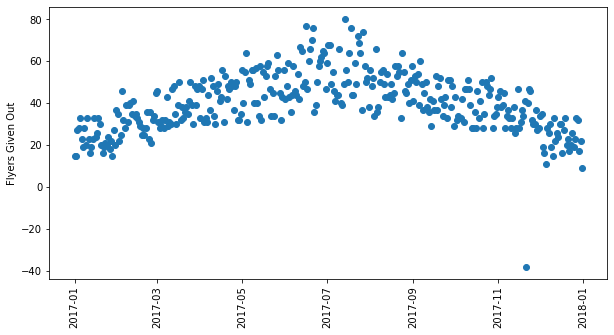

In [18]:
plt.figure(figsize=(10,5))
plt.scatter(df.index, df.Flyers)
plt.xticks(rotation=90)
plt.ylabel("Flyers Given Out")
plt.show()

In [19]:
df[df.Flyers < 0]

,Day,Temperature,Rainfall,Flyers,Price,Sales,Month
Date,,,,,,,
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November


### Well that's certainly a few outliers
- Temperature has the most obvious, with and unrealistic 212 degree day.
- Rainfall also has a higher than average day (maybe 2), however these would not be as outlandish to encounter as a 200+ degree day
- Now there are 4 days with sales that average over 5x what is normally made on any give day. I might even doubt the suppliers ability to meet such demands
- How do you even give out - 38 Flyers?

---

### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept? What about Upper outliers?
- Based on my knowledge of the data, I want to explore possible outliers for Temperature, Sales, Flyers, and Rainfall


In [20]:
# function pulled from Curriculum

def get_lower_and_upper_bounds(col, mult=1.5):
    '''
    positional arguments:
    col: a pandas Series
    keyword arguments:
    mult: default 1.5, the magnutude specified for the IQR rule
    
    returns:
    lower_bound, upper_bound: two float values representing the fence values requested
    '''
    q1 = col.quantile(0.25)
    q3 = col.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - mult * iqr
    upper_bound = q3 + mult * iqr
    return lower_bound,upper_bound

In [21]:
# Rainfall
rain_lower, rain_upper = get_lower_and_upper_bounds(df.Rainfall)
rain_lower, rain_upper

(0.26, 1.3)

In [23]:
# Temperature
temp_lower, temp_upper = get_lower_and_upper_bounds(df.Temperature)
temp_lower, temp_upper

(16.700000000000003, 104.7)

In [24]:
# Sales 
sales_lower, sales_upper = get_lower_and_upper_bounds(df.Sales)
sales_lower, sales_upper

(5.0, 45.0)

In [25]:
# Flyers
flyer_lower, flyer_upper = get_lower_and_upper_bounds(df.Flyers)
flyer_lower, flyer_upper

(4.0, 76.0)

### Do these outliers limits makes sense?
- Rainfall:NO.There alot of days without rainfall. Without geographical evidence suggesting thats out of the norm, we can assume these arent reliable.
- Temperature:Debatedly, YES. While outliers that might skew data would be more extreme, this is a somewhat acceptable range to have when considering Temp.
- Sales:YES. The upper and lower outlier range gives is exactly what the avg rage of sales is.
- Flyers:NO for Upper, YES for Lower.

---

### Next Question

Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?What about Upper bounds?

In [22]:
# Rainfall
rain_lower, rain_upper = get_lower_and_upper_bounds(df.Rainfall, mult=3)
rain_lower, rain_upper

(-0.13, 1.69)

In [26]:
# Temperature
temp_lower, temp_upper = get_lower_and_upper_bounds(df.Temperature, mult=3)
temp_lower, temp_upper

(-16.299999999999997, 137.7)

In [27]:
# Sales 
sales_lower, sales_upper = get_lower_and_upper_bounds(df.Sales, mult=3)
sales_lower, sales_upper

(-10.0, 60.0)

In [28]:
# Flyers
flyer_lower, flyer_upper = get_lower_and_upper_bounds(df.Flyers, mult=3)
flyer_lower, flyer_upper

(-23.0, 103.0)

### Do these outliers limits makes sense?

- Rainfall:NO.The lower limit is set at negative rainfall(impossible), however the Upper limit does show how extreme some of the rainfall has been.
- Temperature:The lower limit would signify a extreme outlier, but the dates were dealing with doesnt have anything below that range. The upper limit however is very relevant and applicable.
- Sales:The lower makes no sense(Cant have negative sales), but the upper limit makes sense to use considering some of the higher sales
- Flyers:The lower confirms that our day with negative flyers is an extreme outlier.

---

### Next Question

#### Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    - Should certain outliers be kept or removed?

In [ ]:
for col in df.columns:
    print(col)
    plt.hist(df[col], bins=20)
    plt.show()

In [ ]:
# Flyers, Temp and Rainfall all have normal distribution

# Flyers
df['z_score_flyer'] = (df['Flyers'] - df['Flyers'].mean()) / df['Flyers'].std()

# Temperature
df['z_score_temp'] = (df['Temperature'] - df['Temperature'].mean()) / df['Temperature'].std()

# Rainfall
df['z_score_rainfall'] = (df['Rainfall'] - df['Rainfall'].mean()) / df['Rainfall'].std()

df.head()

In [ ]:
# Flyers
df[df.z_score_flyer.abs() > 2]

In [ ]:
# Temperature
df[df.z_score_temp.abs() > 2]

In [ ]:
# Rainfall
df[df.z_score_rainfall.abs() > 2]